# PREMIERE APPROCHE : t-SNE

In [ ]:
# Packages
import pandas as pd
import numpy as np
from Bio import SeqIO
from sklearn.manifold import TSNE
import plotly.express as px


# Import plotting tools
#import matplotlib.pyplot as plt
#import seaborn as sns


#import numpy as np
#from scipy.spatial.distance import pdist
#from sklearn.manifold import TSNE

Le fichier fasta comprend 5 valeurs (A, T, C, G ou -) encodé par 65, 84, 67, 71 et 45

In [ ]:
# Creation of a function to convert sequence in numeric vector
def convert_to_num(sequence):
  num_list=[]

  for letter in sequence:
    num_list.append(round((ord(letter)-45)/39, 1))

  return num_list

In [ ]:
# Parse fasta file
id_list = []
num_seq_list = []
seq_list=[]

for record in SeqIO.parse('/content/drive/MyDrive/long_project/premier_alignement.fasta', 'fasta'):
  id_list.append(record.id)
  num_seq_list.append(list(convert_to_num(record.seq)))
  seq_list.append(record.seq)

In [ ]:
np.asarray(seq_list).shape

(186, 5494)

In [ ]:
print(np.asarray(num_seq_list))

[[0.6 0.5 0.6 ... 0.6 0.7 0.6]
 [0.6 0.5 0.6 ... 0.6 0.7 0.6]
 [0.6 0.5 0.6 ... 1.  0.7 0.6]
 ...
 [0.6 0.5 0.6 ... 0.6 0.7 0.6]
 [0.6 0.5 0.6 ... 0.6 0.7 0.6]
 [0.6 0.5 0.6 ... 0.6 0.7 0.6]]


In [25]:
excel = pd.read_excel("/content/drive/MyDrive/long_project/metadata_premier_alignement.ods")

In [ ]:
# Read excel file
label_list =  []
excel = pd.read_excel("/content/drive/MyDrive/long_project/metadata_premier_alignement.ods")

for id in id_list:
  label_list.append(excel.type[list(excel.id).index(id)])

In [ ]:
len(label_list)

186

In [ ]:
set(label_list)

{1, 2, 3, 4, 'S. 1,4,5,12:i:-', 'S. Typhimurium'}

In [ ]:
len(set(label_list))

6

In [ ]:
np.asarray(num_seq_list).shape

(186, 5494)

In [ ]:
# First we will try to create the t-SNE keeping the same dimensions (=?)

# It would be possible to reduce the number of dimensions to a reasonable amount (50?) using another
# dimensionality reduction method (PCA for dense data or truncatedSVD for sparse data).

In [ ]:
# Configure t-SNE function. 
embed = TSNE(
    n_components=2, # default=2, Dimension of the embedded space.
    perplexity=6, # default=30.0, The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
    early_exaggeration=12, # default=12.0, Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. 
    learning_rate=200, # default=200.0, The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers.
    n_iter=5000, # default=1000, Maximum number of iterations for the optimization. Should be at least 250.
    n_iter_without_progress=300, # default=300, Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. 
    min_grad_norm=0.0000001, # default=1e-7, If the gradient norm is below this threshold, the optimization will be stopped.
    metric='euclidean', # default=’euclidean’, The metric to use when calculating distance between instances in a feature array.
    init='random', # {‘random’, ‘pca’} or ndarray of shape (n_samples, n_components), default=’random’. Initialization of embedding
    verbose=0, # default=0, Verbosity level.
    random_state=42, # RandomState instance or None, default=None. Determines the random number generator. Pass an int for reproducible results across multiple function calls.
    method='barnes_hut', # default=’barnes_hut’. By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. 
    angle=0.5, # default=0.5, Only used if method=’barnes_hut’ This is the trade-off between speed and accuracy for Barnes-Hut T-SNE.
    n_jobs=-1, # default=None, The number of parallel jobs to run for neighbors search. -1 means using all processors. 
)

In [ ]:
# Transform dm
num_seq_list_embedded = embed.fit_transform(num_seq_list)

In [ ]:
# Print results
print('New Shape of dm: ', num_seq_list_embedded.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)
#print('Embedding vectors: ', embed.embedding_)

New Shape of dm:  (186, 2)
Kullback-Leibler divergence after optimization:  0.2724699378013611
No. of iterations:  4999


In [ ]:
# Create a scatter plot
fig = px.scatter(None, x=num_seq_list_embedded[:,0], y=num_seq_list_embedded[:,1], 
                 labels={
                     "x": "Dimension 1",
                     "y": "Dimension 2",
                 },
                 opacity=1, color=np.asarray(label_list).astype(str))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="t-SNE")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

# DEUXIEME APPROCHE : GRAPH

In [23]:
!pip install odfpy
!pip install Bio

     |████████████████████████████████| 717 kB 9.0 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160693 sha256=af3f42e3f3bc45dc3f6dde39b702f9043c06d9f2575782a4c8f199b3df7e8a96
  Stored in directory: /root/.cache/pip/wheels/e2/f4/5d/a68c656235d33455a1d0f78e877acddfa006907a6d52d7e6ee
Successfully built odfpy


In [3]:
from Bio import SeqIO

# Création d'un dictionnaire avec la clé = id et la valeur = séquence
seq_dic = {}
for record in SeqIO.parse('/content/drive/MyDrive/long_project/premier_alignement.fasta', 'fasta'):
  seq_dic[record.id]=record.seq

ModuleNotFoundError: ignored

In [1]:
from Bio import AlignIO

# Création d'un 'MultipleSeqAlignment object":
alignment = AlignIO.read('/content/drive/MyDrive/long_project/premier_alignement.fasta','fasta')

ModuleNotFoundError: ignored

In [ ]:
#model blastn ou trans

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

# Création d'une matrice de distance à partir des valeurs du dictionnaire ('identity' exemple donné sur biopython)
calculator = DistanceCalculator('identity')
distance = calculator.get_distance(alignment)

In [ ]:
import numpy as np

# Conversion en array numpy
distance_array=np.asarray(distance)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


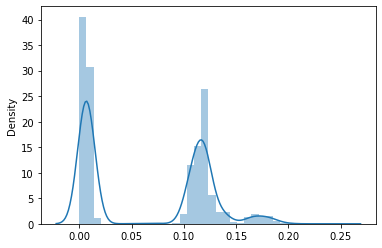

In [ ]:
sns.distplot(distance_array)

In [ ]:
np.max(distance_array)

0.24681470695303964

In [ ]:
# Les distances vont correspondre aux poids donc il faut que les noeuds proches aient une valeur élevée
weight_array = np.max(distance_array) - distance_array

In [ ]:
weight_array[weight_array==np.max(weigth_array)] = 0

In [ ]:
weight_array

array([[0.        , 0.24099017, 0.07044048, ..., 0.13596651, 0.24080815,
        0.12995996],
       [0.24099017, 0.        , 0.07044048, ..., 0.13596651, 0.24080815,
        0.12995996],
       [0.07044048, 0.07044048, 0.        , ..., 0.06188569, 0.0706225 ,
        0.05769931],
       ...,
       [0.13596651, 0.13596651, 0.06188569, ..., 0.        , 0.13651256,
        0.12358937],
       [0.24080815, 0.24080815, 0.0706225 , ..., 0.13651256, 0.        ,
        0.13014197],
       [0.12995996, 0.12995996, 0.05769931, ..., 0.12358937, 0.13014197,
        0.        ]])

#**Matrice de distance à partir de ....**

In [4]:
!pip install Bio

     |████████████████████████████████| 272 kB 8.6 MB/s 
     |████████████████████████████████| 2.3 MB 42.3 MB/s 


In [5]:
from Bio import SeqIO

# Parse fasta file
id_list = []
seq_list=[]

for record in SeqIO.parse('/content/drive/MyDrive/long_project/premier_alignement.fasta', 'fasta'):
  id_list.append(record.id)
  seq_list.append(record.seq)

In [8]:
import pandas as pd
import numpy as np

# Création d'un dataframe pour ranger chaque colonne
seq_df = pd.DataFrame(np.asarray(seq_list),
                 index=id_list,
                 columns=range(len(seq_list[:][0])))

In [9]:
# Comptage pour chercher le nucléotide majoritaire
letter_count = seq_df.describe()

In [10]:
letter_count

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5454,5455,5456,5457,5458,5459,5460,5461,5462,5463,5464,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474,5475,5476,5477,5478,5479,5480,5481,5482,5483,5484,5485,5486,5487,5488,5489,5490,5491,5492,5493
count,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,C,A,C,A,C,G,T,G,G,A,G,G,C,C,G,A,C,C,C,C,G,G,C,C,A,G,C,C,C,C,G,G,C,C,T,C,C,C,A,A,...,G,C,C,C,T,C,C,C,G,A,T,A,G,C,C,G,C,A,C,T,T,C,T,T,C,G,C,A,C,T,G,T,T,G,G,C,A,C,G,C
freq,184,179,185,184,185,175,173,184,184,185,184,184,178,178,185,173,185,185,185,185,185,185,184,184,185,185,165,174,184,172,185,185,171,184,184,173,173,184,173,175,...,185,179,185,175,129,185,175,185,185,129,105,175,183,183,185,178,184,184,178,129,185,173,185,173,185,184,185,173,175,184,185,129,129,185,184,185,175,185,185,185


In [11]:
seq_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5454,5455,5456,5457,5458,5459,5460,5461,5462,5463,5464,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474,5475,5476,5477,5478,5479,5480,5481,5482,5483,5484,5485,5486,5487,5488,5489,5490,5491,5492,5493
12CEB4764SAL,C,A,C,A,C,G,T,G,G,A,G,G,C,C,G,A,C,C,C,C,G,G,C,C,A,G,C,C,C,C,G,G,C,C,T,C,C,C,A,A,...,G,C,C,C,T,C,C,C,G,A,T,A,G,C,C,G,C,A,C,T,T,C,T,T,C,G,C,A,C,T,G,T,T,G,G,C,A,C,G,C
2011_01883,C,A,C,A,C,G,T,G,G,A,G,G,C,C,G,A,C,C,C,C,G,G,C,C,A,G,C,C,C,C,G,G,C,C,T,C,C,C,A,A,...,G,C,C,C,T,C,C,C,G,A,T,A,G,C,C,G,C,A,C,T,T,C,T,T,C,G,C,A,C,T,G,T,T,G,G,C,A,C,G,C
2014LSAL04138,C,A,C,A,C,G,T,G,G,A,G,G,C,C,G,A,C,C,C,C,G,G,C,A,A,G,T,C,T,C,G,G,C,C,C,C,C,C,A,A,...,G,C,C,C,G,C,C,C,G,C,C,A,A,T,C,G,C,A,C,C,T,C,T,T,C,G,C,A,C,C,G,A,A,G,G,C,A,T,G,C
2013LSAL04317,C,A,C,A,C,G,T,G,G,A,G,G,C,C,G,G,C,C,C,C,G,G,C,C,A,G,C,C,C,C,G,G,C,C,T,T,T,C,G,A,...,G,C,C,C,G,C,C,C,G,C,C,A,G,C,C,G,C,A,C,C,T,T,T,T,C,G,C,G,C,T,G,A,A,G,G,C,A,C,G,C
11CEB5897SAL,C,A,C,A,C,A,T,G,G,A,G,G,C,T,G,A,C,C,C,C,G,G,C,C,A,G,C,A,C,C,G,G,C,C,T,C,C,C,A,G,...,G,C,C,T,G,C,T,C,G,C,C,G,G,C,C,G,C,A,T,C,T,C,T,T,C,G,C,A,T,T,G,A,A,G,G,C,G,C,G,C


In [12]:
# Recherche de la séquence majoritaire -> sera égale à 1 (rmq : ne prend pas bien en compte les '-' ?)
for i in range(len(seq_list[:][0])):
  seq_df[i][:] = seq_df[i][:].map(lambda letter: 1 if letter == letter_count[i]['top'] else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
seq_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5454,5455,5456,5457,5458,5459,5460,5461,5462,5463,5464,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474,5475,5476,5477,5478,5479,5480,5481,5482,5483,5484,5485,5486,5487,5488,5489,5490,5491,5492,5493
12CEB4764SAL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011_01883,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014LSAL04138,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1
2013LSAL04317,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,...,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1
11CEB5897SAL,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,1


In [14]:
from scipy.spatial import distance_matrix

test = distance_matrix(np.asarray(seq_df), np.asarray(seq_df))

In [15]:
test

array([[ 0.        ,  5.65685425, 31.12876483, ..., 24.67792536,
         5.74456265, 25.33771892],
       [ 5.65685425,  0.        , 31.12876483, ..., 24.67792536,
         5.74456265, 25.33771892],
       [31.12876483, 31.12876483,  0.        , ..., 31.8747549 ,
        31.11269837, 32.23352292],
       ...,
       [24.67792536, 24.67792536, 31.8747549 , ...,  0.        ,
        24.61706725, 26.01922366],
       [ 5.74456265,  5.74456265, 31.11269837, ..., 24.61706725,
         0.        , 25.3179778 ],
       [25.33771892, 25.33771892, 32.23352292, ..., 26.01922366,
        25.3179778 ,  0.        ]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


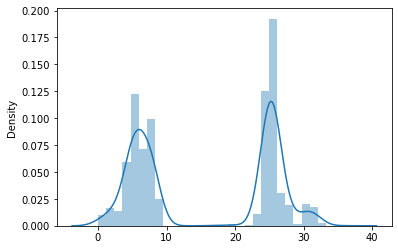

In [18]:
import seaborn as sns

sns.distplot(test)

In [19]:
import networkx as nx

# Utilisation de NetworkX pour la construction d'un graph
graph=nx.convert_matrix.from_numpy_matrix(test)

In [26]:
# Recherche du nombre de type (=6) pour déterminer les couleurs à associer
excel.groupby(['type']).size()

type
1                   8
2                  13
3                  21
4                  22
S. 1,4,5,12:i:-    80
S. Typhimurium     42
dtype: int64

In [27]:
excel.describe(include='all')

,id,type
count,186,186
unique,186,6
top,11CEB3015SAL,"S. 1,4,5,12:i:-"
freq,1,80


In [28]:
import pandas as pd

# Création d'une liste de couleurs correspondant à la liste des nodes
excel = pd.read_excel("/content/drive/MyDrive/long_project/metadata_premier_alignement.ods")
label_list = []
color_list = []

for name in distance.names:
  label_list.append(excel.type[list(excel.id).index(name)])

for label in label_list:
  if label == 'S. Typhimurium':
    color_list.append('mediumspringgreen')
  elif label == 'S. 1,4,5,12:i:-':
    color_list.append('royalblue')
  elif label == 1:
    color_list.append('deeppink')
  elif label == 2:
    color_list.append('orange')
  elif label == 3:
    color_list.append('blueviolet')
  elif label == 4:
    color_list.append('orangered')

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Création du layout des positions ("Force-directed graph drawing")
node_pos = nx.kamada_kawai_layout(graph)

###**Regarder les paramètres du nx.draw et du convert.matrix, il faut peut être ne pas prendre en compte certaines weigths et il faut résoudre le problème de la valeur du weight qui doit être élevée pour les points proches**

In [ ]:
graph.adj.items()

ItemsView(AdjacencyView({0: {1: {'weight': 5.656854249492381}, 2: {'weight': 31.12876483254676}, 3: {'weight': 25.534290669607408}, 4: {'weight': 24.596747752497688}, 5: {'weight': 5.830951894845301}, 6: {'weight': 7.14142842854285}, 7: {'weight': 25.612496949731394}, 8: {'weight': 24.71841418861655}, 9: {'weight': 5.744562646538029}, 10: {'weight': 5.5677643628300215}, 11: {'weight': 23.62202362203543}, 12: {'weight': 5.0990195135927845}, 13: {'weight': 5.656854249492381}, 14: {'weight': 5.5677643628300215}, 15: {'weight': 23.811761799581316}, 16: {'weight': 7.280109889280518}, 17: {'weight': 5.291502622129181}, 18: {'weight': 5.744562646538029}, 19: {'weight': 5.830951894845301}, 20: {'weight': 7.874007874011811}, 21: {'weight': 5.916079783099616}, 22: {'weight': 25.573423705088842}, 23: {'weight': 5.0}, 24: {'weight': 5.0990195135927845}, 25: {'weight': 24.698178070456937}, 26: {'weight': 23.83275057562597}, 27: {'weight': 5.656854249492381}, 28: {'weight': 6.4031242374328485}, 29: 

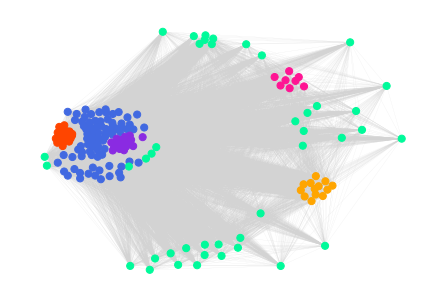

In [ ]:
# Draw
nx.draw(G=graph,
        pos=node_pos,
        with_labels=False,
        node_size=50,
        node_color=color_list,
        width=0.1,
        edge_color='lightgrey',
        labels=label_dic)

In [ ]:
nx.draw_networkx_nodes(G=graph,
        pos=node_pos,
        with_labels=False,
        node_size=50,
        node_color=color_list,
        node_shape='o',
        width=0.1,
        label=label_list,
        edge_color='lightgrey')

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



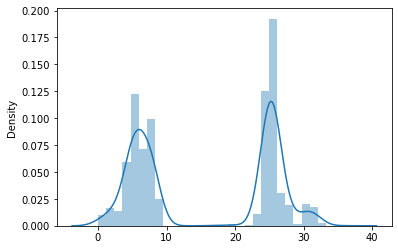

In [ ]:
import seaborn as sns
# Recherche de la répartition des poids tout type confondu
sns.distplot(test)

In [ ]:
# Recherche de la répartition des poids au sein d'un même type pour chercher une manière de rationnaliser ce qui peut former un groupe

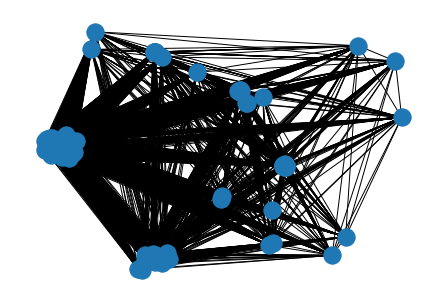

In [ ]:
# Force-directed graph drawing
nx.draw_kamada_kawai(graph)